### Note for question2 
- Please follow the template to complete q2
- You may create new cells to report your results and observations

In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


## P1. Create data and plot
### TODO
- implement the true function $f(x)$ defined in the write-up 
- use function name **model()**
- sample 30 random points with noise
- plot sampled points together with the model function

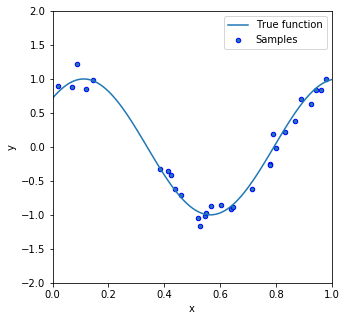

In [4]:
# Define the function to generate data points
def model(X):
    return np.sin(2.2 * np.pi * X + 0.8)
# Initialize random seed
np.random.seed(0)
# Generate noisy data points: (x,y)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = model(x) + np.random.randn(n_samples) * 0.1
# Plot true model and sampled data points
plt.figure(figsize=(5, 5))
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, model(X_test), label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
# Visualize data points
plt.legend(loc="best")
plt.show()







## P2. Fit a linear model
### TODO
- use sklearn to fit model: $h(x) = w_0 + w_1x$
- report $w=[w_0,w_1]$
- plot the fitted model $h(x)$ together with data points

In [5]:
# Fit a linear model in the original space
x = x.reshape(-1,1)
y = y.reshape(-1,1)
reg = LinearRegression().fit(x, y)
w1 = reg.coef_[0]
w0 = reg.intercept_
w = [w0,w1]
print(w)

[array([0.06038094]), array([-0.19787027])]


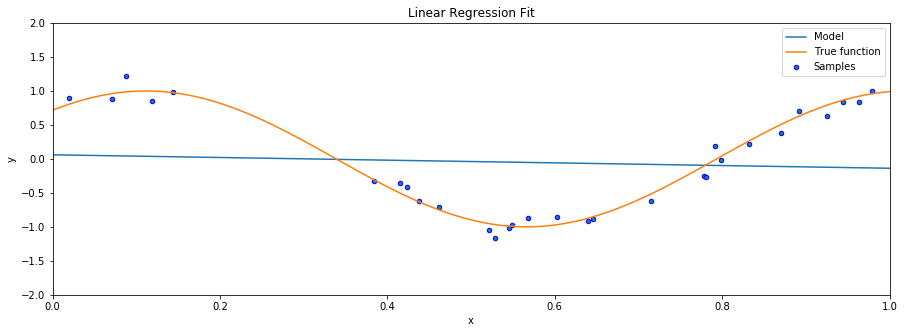

In [6]:
# Plot fitted linear model
plt.figure(figsize=(15, 5))
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, model(X_test), label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Linear Regression Fit")
plt.show()

## P3. Fit a polynomial curve
### TODO
- augment the original feature to $[x, x^2, \cdots, x^{15}]$
- fit the polynomial curve: $h(x) = \sum_{i=0}^{15} w_i x^{i}$
- report $w=[w_0,w_1, \cdots, w_{15}]$
- plot the fitted model $h(x)$ together with data points

In [7]:
# Augment the original feature to a 15-vector
degree = 15
n15reg = PolynomialFeatures(degree)
augx = n15reg.fit_transform(x)
print(augx.shape)
# Fit linear model to the generated 15-vector features
augreg = LinearRegression().fit(augx,y)
w = augreg.coef_[0]
weights = np.insert(w,0,augreg.intercept_[0])
print(weights)


(30, 16)
[ 3.11666317e+01  0.00000000e+00 -2.97809480e+03  1.03892675e+05
 -1.87418803e+06  2.03715545e+07 -1.44872449e+08  7.09311984e+08
 -2.47064769e+09  6.24558698e+09 -1.15676113e+10  1.56894446e+10
 -1.54005585e+10  1.06456986e+10 -4.91376344e+09  1.35919341e+09
 -1.70380431e+08]


(100, 1)


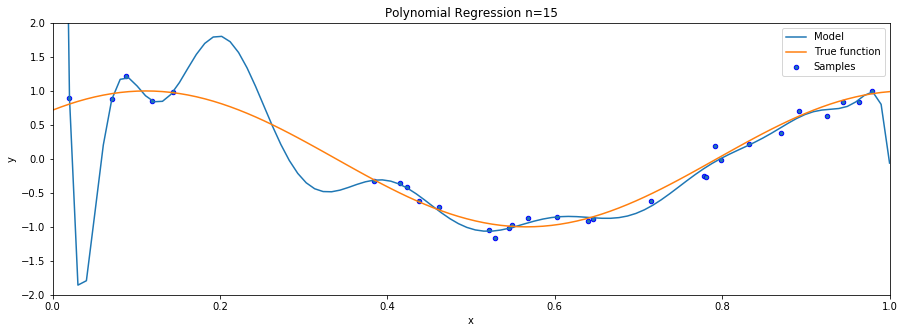

In [11]:
# Plot fitted curve and sampled data points
from sklearn.pipeline import make_pipeline
n15reg=make_pipeline(PolynomialFeatures(15),LinearRegression())
n15reg.fit(x,y)
plt.figure(figsize=(15, 5))
X_test = np.linspace(0, 1, 100)
yval = n15reg.predict(X_test[:, np.newaxis])
print(yval.shape)
plt.plot(X_test, n15reg.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, model(X_test), label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Polynomial Regression n=15")
plt.show()

## P4. Lasso regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L1 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

In [18]:
# Fit 15-degree polynomial with L1 regularization 
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
from sklearn import linear_model
LassoModel = linear_model.Lasso(alpha=0.000007, max_iter=1e4)
LassoModel.fit(augx,y)
w = LassoModel.coef_
weights = np.insert(w,0,LassoModel.intercept_[0])
print(weights)

[  0.84115451   0.           4.04940069 -26.18760545  15.00658696
  13.26518055   5.31423695   0.          -2.1566783   -4.65298778
  -4.52580357  -3.44643585  -1.92253837  -0.20761126  -0.
   1.16084506   4.60247859]


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09454608208037706, tolerance: 0.00175155385437781
  positive)


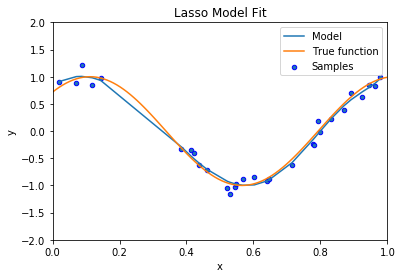

In [13]:
# Plot fitted curve and sampled data points
from sklearn.linear_model import Lasso
X_test = np.linspace(0, 1, 20)
plt.plot(x, LassoModel.predict(augx), label="Model")
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, model(X_test), label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Lasso Model Fit")
plt.show()

In [ ]:
#Observation of values w and lambda
# The best lambda value was very small 0.000007
# The only 3 weights were eliminated to get the 
#model to fit properly the weights on x1, x1^3, 
#and x1^5 were set to zero 
#Understanding of Lasso Regularization 
#Lasso Regression removes weights causing 
#overfitting by shrinking unnessary thetas by
#finding the vertex of the diamond
#However too many varibles can be eliminated 
#if lambda is set to high becasue the lasso 
#misses the vertex of the diamond
#When completed properly only the weights 
#on the most important values should
#remain 
#Observation when lambda is tweaked
#The larger lambda eliminated more weights
#The larger lambda would eliminate too many 
#weights causing the model to underfit, only
#when the lambda was sufficiently small to 
#eliminate only the weights that caused 
#underfitting did the lasso regression fit 
#the real model well  

## P5. Ridge regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L2 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

In [14]:
# Fit 15-degree polynomial with L2 regularization
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha= 0.0001, max_iter=1e5)
RidgeModel.fit(augx,y)
print(RidgeModel.coef_)
print(RidgeModel.intercept_)

[[  0.           1.90502172 -17.24276774   4.25002429  11.61238507
    9.20596081   3.83848301  -1.02446738  -4.18410939  -5.53450391
   -5.38543602  -4.13771324  -2.15164759   0.29118807   2.98672066
    5.79387602]]
[0.94933395]


(30, 16)
(30, 1)


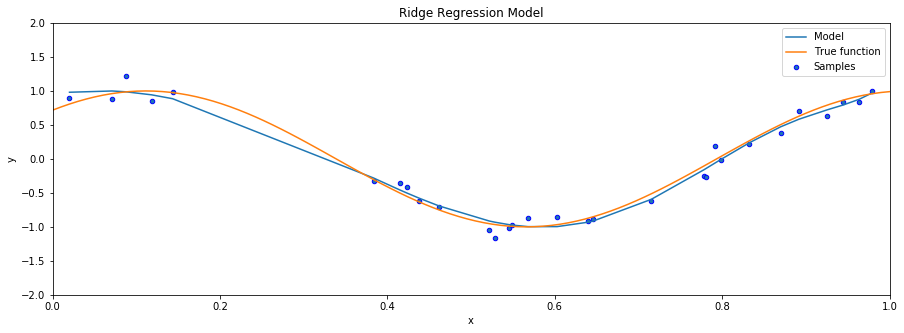

In [15]:
# Plot fitted curve and sampled data points and compare to L1 regularization from P4
plt.figure(figsize=(15, 5))
X_test = np.linspace(0, 1, 100)
#LassoModel.predict(X_test[:, np.newaxis])
print(augx.shape)
print(x.shape)
plt.plot(x, RidgeModel.predict(augx), label="Model")
plt.plot(X_test, model(X_test), label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Ridge Regression Model")
plt.show()